In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('tn_zipcodes.json')

In [3]:
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."


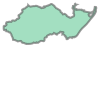

In [4]:
zipcodes.loc[0, 'geometry']

<AxesSubplot:>

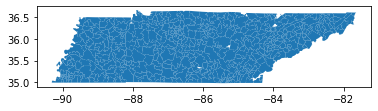

In [5]:
zipcodes.plot()

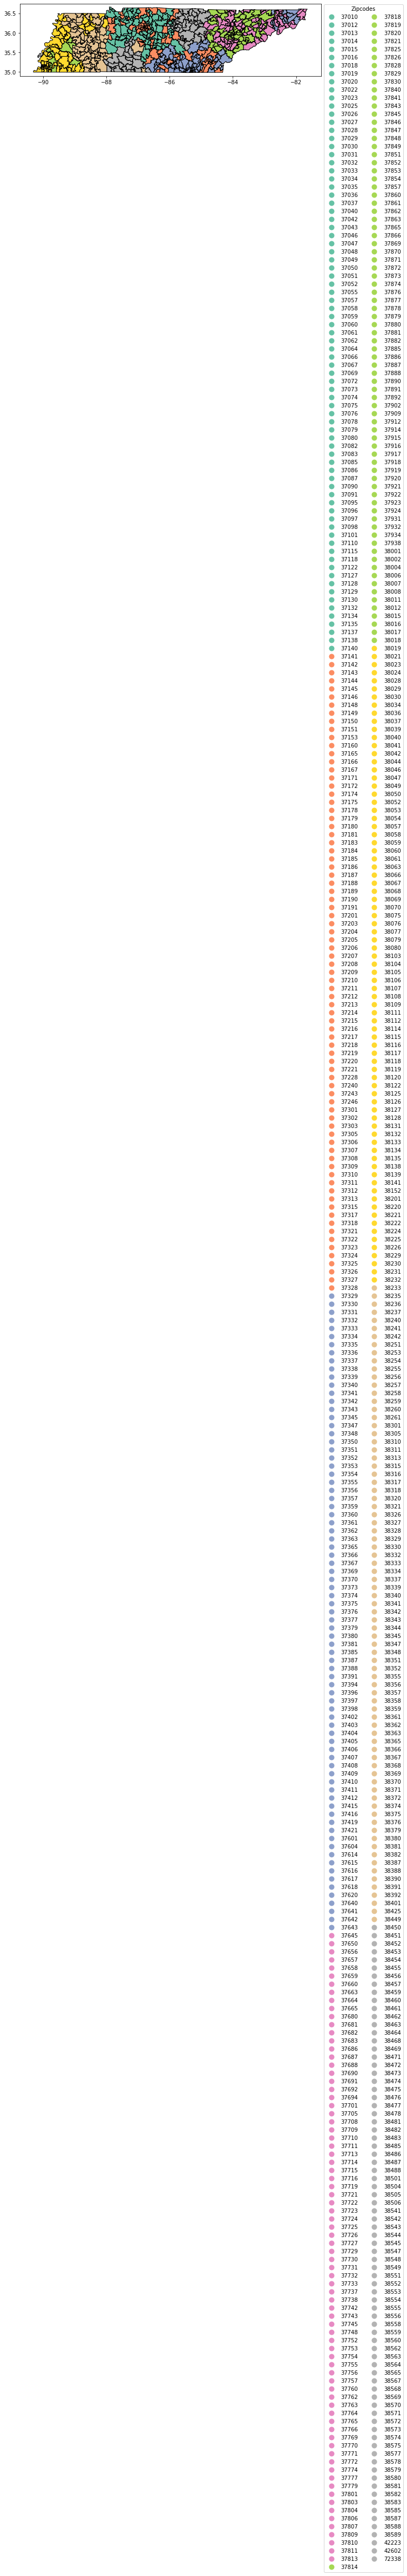

In [7]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'ZCTA5CE10', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
poverty = pd.read_csv('poverty_tn.csv')
poverty.head()

,Unnamed: 0,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng
0,0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212
1,1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872
2,2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220
3,3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274
4,4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969


In [10]:
poverty['geometry'] = poverty.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
poverty.head(3)



,Unnamed: 0,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng,geometry
0,0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221200000001 35.126608)
1,1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.310872 35.029019)
2,2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31421999999999 35.001899)


In [15]:
poverty.head(1)

,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng,geometry
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221200000001 35.126608)


In [16]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
poverty_geo = gpd.GeoDataFrame(poverty, 
                           crs = zipcodes.crs, 
                           geometry = poverty['geometry'])
type(poverty_geo)

geopandas.geodataframe.GeoDataFrame

In [21]:
zipcodes = zipcodes.rename(columns = {'ZCTA5CE10':'zip'})

In [22]:
zipcodes = zipcodes[['zip', 'geometry']]

In [23]:
poverty_zip = gpd.sjoin(poverty_geo, zipcodes, op = 'within')

In [24]:
poverty_zip.head()

,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng,geometry,index_right,zip
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221 35.12661),80,38126
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.31087 35.02902),440,37408
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31422 35.00190),441,37410
3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274,POINT (-83.89927 35.97148),59,37915
4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969,POINT (-90.03397 35.15064),548,38105


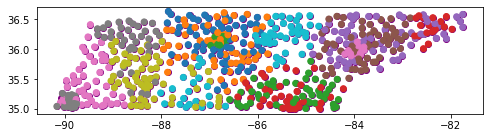

In [25]:
ax = poverty_geo.plot(figsize = (8, 10), color = 'purple')
poverty_zip.plot( ax = ax, column = 'zip');
plt.show();

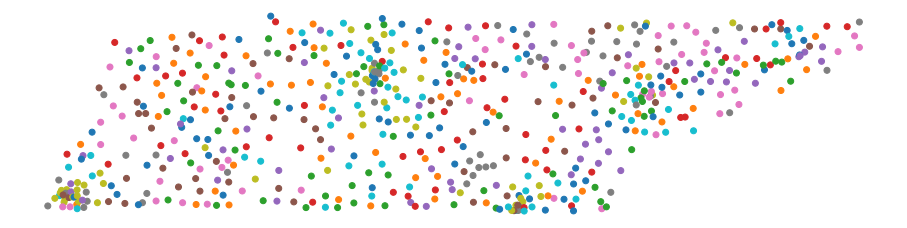

In [26]:
fig, ax = plt.subplots(figsize=(16,4))
poverty_zip.plot(column = '% Poverty Level', 
              ax = ax)
ax.axis('off');

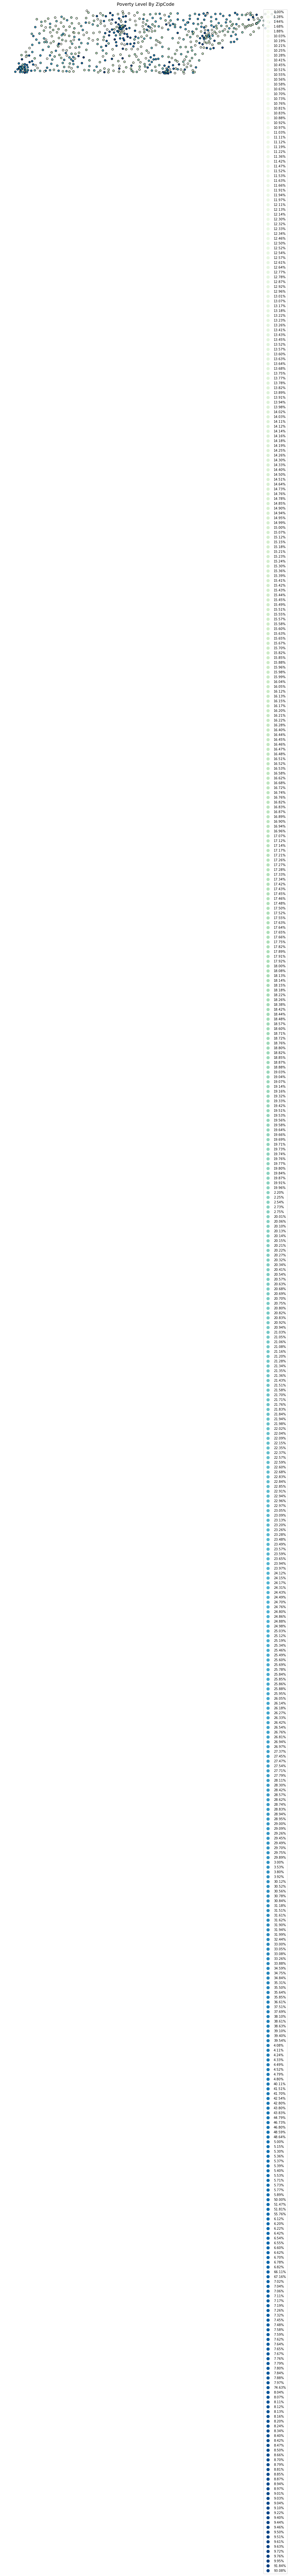

In [28]:
fig, ax = plt.subplots(figsize=(16,4))
poverty_zip.plot(column = '% Poverty Level', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Poverty Level By ZipCode', fontsize = 14)
ax.axis('off');